## Frequencies assignment

A telecommunication company just installed five antennas in the geographical area of interest, as represented in the figure on the left. The Cartesian coordinates of each antenna are reported, in kilometers, in the table on the right.



Due to the agreement with the Local Telecommunication Authority, to each antenna the company can assign a frequency centered in 1 KHz, 3 KHz, 5 KHz, 7 KHz, and 9 KHz. We are to assign a frequency to each antenna so as to minimize the number of frequencies
that are used, guaranteeing that no interference occurs between any pair of antennas.

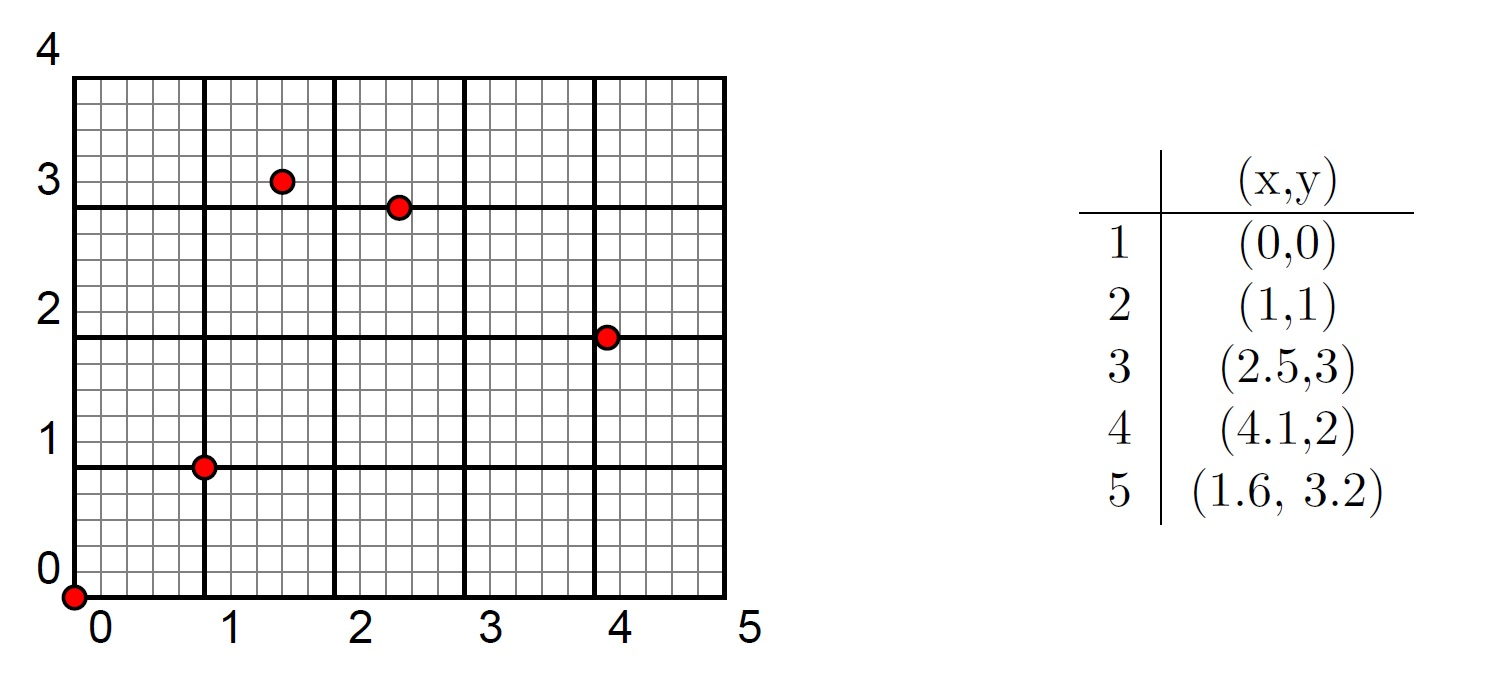



We consider two alternative models of interference.

1. Optimistic: antennas $a_1$, $a_2$ interfere if they have a Euclidean distance nonlarger than $\delta$ =3 Km and they use the same frequency.

2. Conservative: antennas $a_1$, $a_2$ interfere if they have a Euclidean distance nonlarger than $\delta$ = 3 Km and use two frequencies with centers at, respectively, $j$, $j^* $ KHz, such that $|j - j^* | \leq$  2 KHz.

In [2]:
import mip
import numpy as np
from mip import BINARY,INTEGER

In [10]:
# Number of antennas
n_antennas = 5
V = range(5)

# Number of frequencies
n_freq = 5
f = range(5)
J = [1, 3, 5, 7, 9]

# Coordinates of antennas
coord = np.array([[0, 0], [1, 1], [2.5, 3], [4.1, 2], [1.6, 3.2]])

d = np.zeros((n_antennas,n_antennas))
for i in V:
    for j in V:
        if i!=j:
            d[i, j] = np.linalg.norm(coord[i]-coord[j])
# Delta
delta = 3
# Gamma 
gamma = 2

# Auxiliary sets
E = [(i, i2)  for i in V for i2 in V if (i<i2 and d[i, i2] <= delta)]

In [11]:
model = mip.Model()

In [12]:
x = {(i, j): model.add_var(name = str(i)+','+str(J[j]), var_type=BINARY) for i in V for j in f}
y = {j: model.add_var(name=str(J[j]), var_type=BINARY) for j in f}

In [13]:
model.objective = mip.minimize(mip.xsum(y[j] for j in f))

In [14]:
# Assignment constraint
for i in V:
    model.add_constr(mip.xsum(x[i, j] for j in f) == 1)

# Activation constraint
for i in V:
    for j in f:
        model.add_constr(x[i, j] <= y[j])

# Interference constraint
for (i, i2) in E:
    for j in f:
        model.add_constr(x[i, j] + x[i2, j] <= 1)

# Interference2 constraint
for (i, i2) in E:
    for j in f:
        for j2 in f:
            if abs(J[j] - J[j2]) <= gamma:
                model.add_constr(x[i, j] + x[i2, j2] <= 1)

In [15]:
# optimizing
model.optimize()

Cgl0003I 0 fixed, 0 tightened bounds, 93 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 84 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 53 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 27 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 10 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 5 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 4 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 2 strengthened rows, 0 substitutions
Cgl0004I processed model has 51 rows, 30 columns (30 integer (30 of which binary)) and 235 elements
Coin3009W Conflict graph built in 0.000 seconds, density: 10.000%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 3
Cbc0038I Before mini branch and bound, 30 integers at bound fixed and 0 conti

<OptimizationStatus.OPTIMAL: 0>

In [16]:
# Objective function values
model.objective.x

3.0

In [12]:
# variables values
for i in model.vars:
    if i.x != 0:
        print(i.name, i.x)

0,9 1.0
1,1 1.0
2,5 1.0
3,1 1.0
4,9 1.0
1 1.0
5 1.0
9 1.0


 <h3 align="center">Formulation</h3> 
 
- Sets
    - $V$: antennas
    - $J$: frequencies
    
- Parameters
    - $d_{ii^\*}$: Euclidean distance between antennas $i,i^*\in V$
    - $\delta$: limit Euclidean distance for interference
    - $\gamma$: limit frequency distance for interference in model 2

- Additional sets
    - $E = \{(i,i^\*): i,i^\* \in V, i < i^\*, d_{ii^\*} \leq \delta \}$: set of pairs of antennas with Euclidean distance nonlarger than $\delta$ 
- Variables
    - $x_{ij}$: 1 if antenna $i$ takes frequency $j$, 0 otherwise, $i \in V, j \in J$ 
    - $y_j$: 1 if frequency $j$ is used, 0 otherwise, $j \in J$
- Model

\begin{array}{lll}
  \min & \sum_{j\in J} y_{j} \qquad & & \text{(use)}\\
  \textrm{s.t.} &  & \\
  & \sum_{j \in J}x_{ij} = 1 &  i \in V & \text{(assignment)} &\\
  & x_{ij} \leq y_j &  i \in V, j \in J & \text{(activation)} &\\
  & x_{ij}+ x_{i^*j} \leq 1 &  (i,i^*) \in E, j \in J & \text{(interference)} &\\
  & x_{ij},y_j \in \{0,1\} &  i \in V & \text{(binary variables)} &\\
\end{array}

 
For the second interference model, we need to substitute for the constraint (interference) the following
$$
\begin{array}{lll}
& x_{ij}+ x_{i^*j^*} \leq 1 &  (i,i^*) \in E, j \in J, |j - j^*| & \text{(interference 2)} &\\
\end{array}
$$

With interference model 1, the problem is known in the literature as the graph coloring problem. Given an undirected graph, assign a color to each node, minimizing the total number of used colors, such that no two adjacent nodes take the same color. We can formulate our
problem as a graph coloring problem by introducing a graph with a node per antenna, and an edge between each pair of antennas with Euclidean distance nonlarger than $\delta$. We obtain the
graph



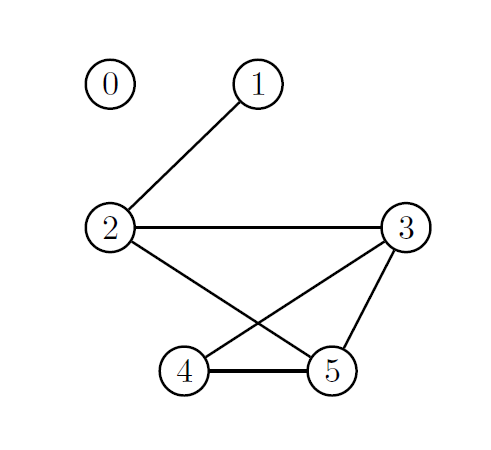

for which an optimal solution is:

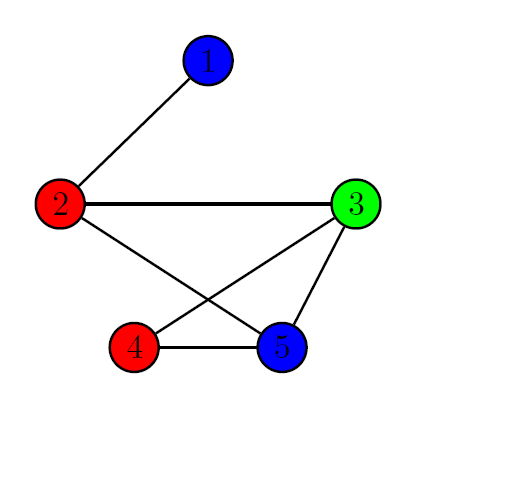